In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [11]:
# Load data
(X, y) = load_digits(return_X_y=True,  n_class = 10)


In [14]:
type(X[0][3])

numpy.float64

In [17]:
X2 = X.astype(int)

In [19]:
y2 = y.astype(int)

In [20]:
X = pd.DataFrame(data = X)
X2 = pd.DataFrame(data = X2)

In [21]:
y = pd.DataFrame(data = y)
y2 = pd.DataFrame(data = y2)

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [22]:
X2.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0


In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


In [31]:
model1 = GaussianNB()

In [33]:
model1.fit(X_train, (y_train))

C:\Users\angus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
model1.score(X_train, y_train)

0.8429844097995546

In [37]:
model1.score(X_test, y_test)

0.8231368186874305

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.5)

In [41]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()

In [42]:
model2.fit(X_train2, y_train2)

C:\Users\angus\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
model2.score(X_train2, y_train2)

0.9053452115812918

In [45]:
model2.score(X_test2, y_test2)

0.9098998887652948

In [62]:
params = (model2.feature_count_ / X_train2.shape[0]) [:, :8]

In [67]:
params[3]

array([0.        , 0.06681514, 0.79510022, 1.38195991, 1.40200445,
       0.75167038, 0.06904232, 0.        ])

In [63]:
params.shape

(10, 8)

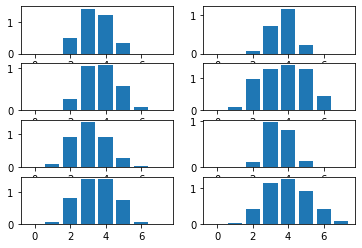

In [73]:
fig, axs = plt.subplots(4,2)

count = 0
for i in range(8):
    
    if i >= 4:
        count = 1
    

    axs[i - 4*count, count].bar([0,1,2,3,4,5,6,7], params[i])


In [74]:
model3 = LinearDiscriminantAnalysis()

In [75]:
model3.fit(X_train, y_train)

C:\Users\angus\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [76]:
model3.score(X_train, y_train)

0.9688195991091314

In [ ]:
model

In [77]:
X_train.shape


(898, 64)

In [83]:
y_train[0].value_counts()

2    100
5     99
8     94
0     94
3     92
4     90
6     85
1     83
9     81
7     80
Name: 0, dtype: int64

In [84]:
model3.score(X_test, y_test)

0.9532814238042269

In [90]:
Z = model3.fit_transform(X_train, y_train)
print(Z.shape, type(Z))

(898, 9) <class 'numpy.ndarray'>


C:\Users\angus\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
component1 = Z[:,0]
component2 = Z[:,1]
df = pd.DataFrame(data = [])

In [171]:
df = y_train.reset_index()
type(df)

pandas.core.frame.DataFrame

In [176]:
df.iloc[:, 1]

0      7
1      2
2      5
3      4
4      0
      ..
893    6
894    6
895    6
896    7
897    6
Name: 0, Length: 898, dtype: int32

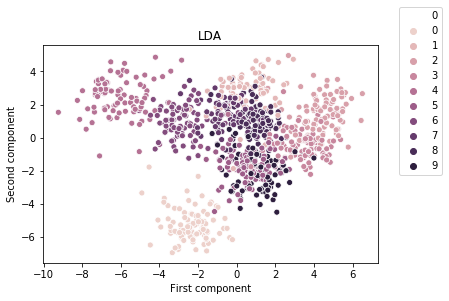

In [179]:
sns.scatterplot(x = component1, y = component2, hue = df.iloc[:, 1], legend = 'full')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('LDA')
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left');


In [180]:
model4 = QuadraticDiscriminantAnalysis()

In [181]:
model4.fit(X_train, y_train)

C:\Users\angus\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\angus\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [182]:
model4.score(X_train, y_train)

0.9298440979955457

In [184]:
model4.score(X_test, y_test)

0.814238042269188

In [188]:
model5 = QuadraticDiscriminantAnalysis(reg_param = 0.5)

In [189]:
model5.fit(X_train, y_train)

C:\Users\angus\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\angus\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.5,
                              store_covariance=False, tol=0.0001)

In [191]:
model5.score(X_train, y_train)

1.0

In [192]:
model5.score(X_test, y_test)

0.9844271412680756